# Progress:

Relevant up to date functions in this notebook:
* Visualization of differences of joint trajectories of different pitch types (with cf_pitcher.csv data)
* demonstration of missing value fill in with machine learning

SAVED MODELS: (test accuracy and balanced accuracy)
* cf data, all pitch types: 0.64
* cf data, 3 pitch types (fastball, breaking ball, changeup) only windup and 5 players with most pitches: 0.87, 0.91
* cf data, 3 pitch types (fastball, breaking ball, changeup) only windup and  all players: 0.79 0.65
* sv data, 3 pitch types (fastball, breaking ball, changeup) only windup and  all players: 0.6, 0.49
* cf data, 3 pitch types (fastball, breaking ball, changeup) only Stretch and 5 players with most pitches: 0.87, 0.79
* cf data, 3 pitch types (fastball, breaking ball, changeup) only Stretch and all players: 0.73, 0.6

    
PREDICT PITCHING POSITION (Stretch/Windup)
* modelPosition: cf data: 0.96 0.96
* modelPositionSV: sv data, 0.94 0.93

PREDICT RELEASE FRAME:
* on videos directly, predict from a range of the 80th until the 100th frame: 90% acc for a single frame 


### 1. Evaluation of parameters
* Trained differen convolutional and recurrent NN models
* Tested hyperparameters systematically with csv file and with genetic programming (but tended to make only fully connected layers)
* Best accuracy 64% 

### 2. Coordinate trajectories
* Investigate data by plotting mean and different examples of joints by pitch type

# 1. Evaluation of parameters

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as sp
import scipy.stats

#from sklearn.preprocessing import StandardScaler
#from data_preprocess import Preprocessor
#from tools import Tools
#from model import Model
import matplotlib.pylab as plt

import shutil

In [ ]:
df = pd.read_csv("test_parameters.csv")
columns = df.columns.tolist()
print(columns)

In [ ]:

#df = df.sort_values(by = "highest_acc")
#print(len(df))
#df = df.drop(df.index[range(450)])
#acc = df["highest_acc"].values
print(acc)
columns = ['Batchsize', 'align', 'dropout', 'file', 'learning_rate', 'len_train', 
           'model', 'nr_classes', 'optimizer', 'regularization', 
           '1st_conv_filters', '1st_conv_kernel', '2nd_conv_filter', '2nd_conv_kernel', '1st_hidden_dense', 
           '2nd_hidden_dense']
#'lstm_hidden_layers', 'lstm_units', 

plt.rcParams.update({'font.size': 18})
for col in columns:
    act = np.unique(df[col].values)
    cut = [np.mean((df[df[col]==elem])["highest_acc"].values) for elem in act]

    plt.figure()
    plt.ylim([0.5,0.65])
    y_pos = range(len(act))
    plt.bar(y_pos, cut, align='center', alpha=0.5, width = 0.5)
    #plt.ylim([0,350])
    plt.xticks(y_pos, act)
    plt.ylabel('highest test accuracy achieved')
    plt.title(col)
    plt.show()

## Try to relate two different parametes to each other

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X = df["1st_conv_filters"].values
Y = df['1st_conv_kernel'].values
#X, Y = np.meshgrid(X, Y)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(X, Y, df["highest_acc"].values)
#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# 2. Coordinate trajectories

In [63]:
import numpy as np
data = np.load("interpolated.npy")

In [64]:
from data_preprocess import Preprocessor
pre = Preprocessor("cf_data.csv")
pre.remove_small_classes(50)
#NEW
a, stat = pre.get_list_with_most("Pitcher")
print(a)
pre.cut_file_to_pitcher(a[0])
data = pre.get_coord_arr(None)

labels = pre.get_labels()
print(data.shape)
print(labels.shape)

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (253,254,255,256,257,258,259,289) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


csv eingelesen with length  13150
Only Pitcher rows
[['Changeup' 491]
 ['Curveball' 627]
 ['Eephus' 1]
 ['Fastball (2-seam)' 1341]
 ['Fastball (4-seam)' 2075]
 ['Fastball (Cut)' 287]
 ['Fastball (Split-finger)' 49]
 ['Knuckle curve' 73]
 ['Knuckleball' 350]
 ['Sinker' 265]
 ['Slider' 913]
 ['Unknown Pitch Type' 103]]
Removed because not enought class members:  ['Eephus' 'Fastball (Split-finger)'] Unknown Pitch Type
[527054.0, 285079.0, 592314.0, 448802.0, 656794.0]
(463, 167, 18, 2)
(463,)


# New data

In [14]:
cf = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/cf_pitcher.csv")
print(len(np.unique(cf["Game"].values)))
print(len(cf.index))
data = []
labels = []
for i in range(1000):
    d = np.array(eval(cf.loc[i]["Data"]))
    if len(d)<160 or cf.loc[i]["Pitch Type"] is None:
        print("too short")
        continue
    data.append(d[:160])
    labels.append(cf.loc[i]["Pitch Type"])
data = np.array(data)
print(data.shape, len(labels))

labels = np.array(labels)
unique = np.unique(labels)
print(unique)
index_liste = []
for pitches in unique:
    index_liste.append(np.where(labels==pitches))
# print(index_liste)

2331
2331
(1000, 160, 12, 2) 1000
['Changeup' 'Curveball' 'Fastball (2-seam)' 'Fastball (4-seam)'
 'Fastball (Cut)' 'Fastball (Split-finger)' 'Knuckle curve' 'Knuckleball'
 'Sinker' 'Slider']


## Plot all examples

(1000, 2)
(12, 160, 1000, 2)
(1000, 160, 12, 2)
-----------------------------------------------------------------------------
JOINT:  Right shoulder


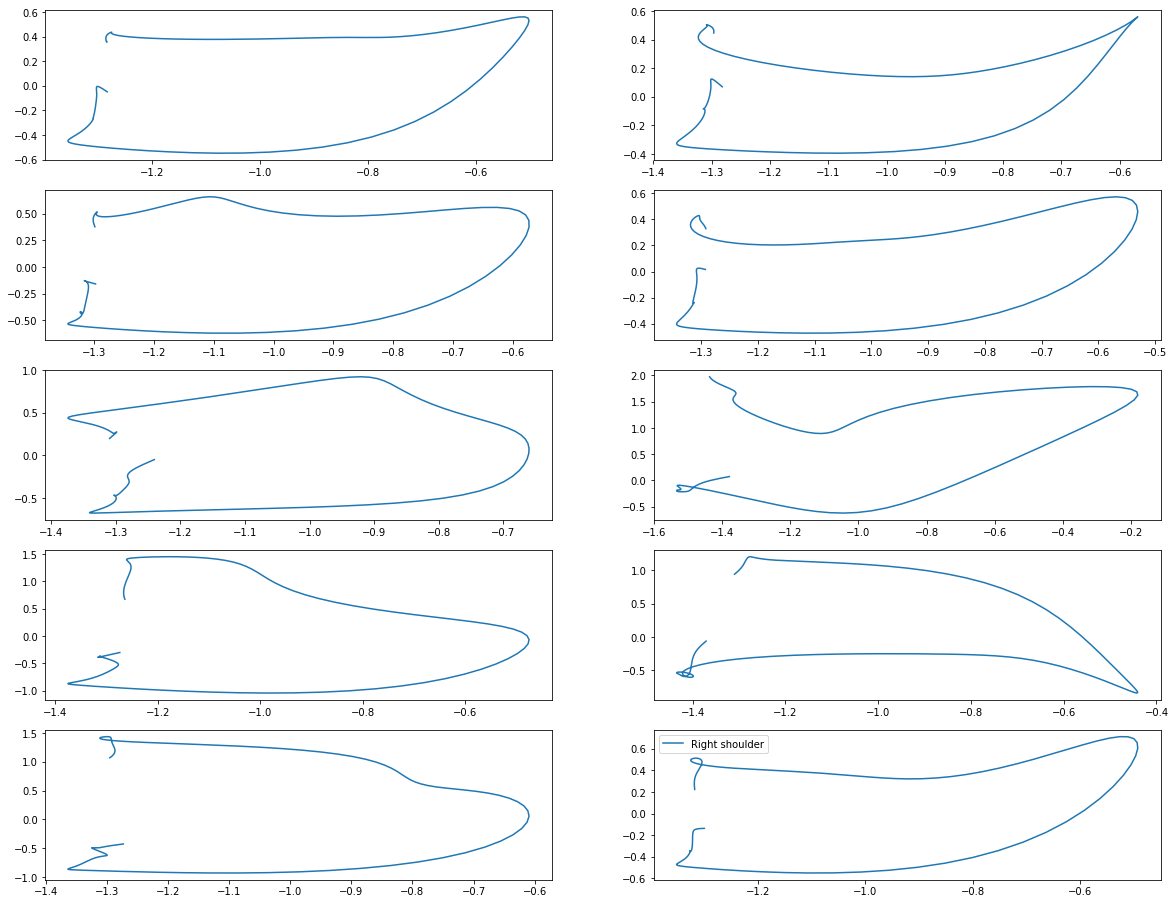

-----------------------------------------------------------------------------
JOINT:  Right elbow


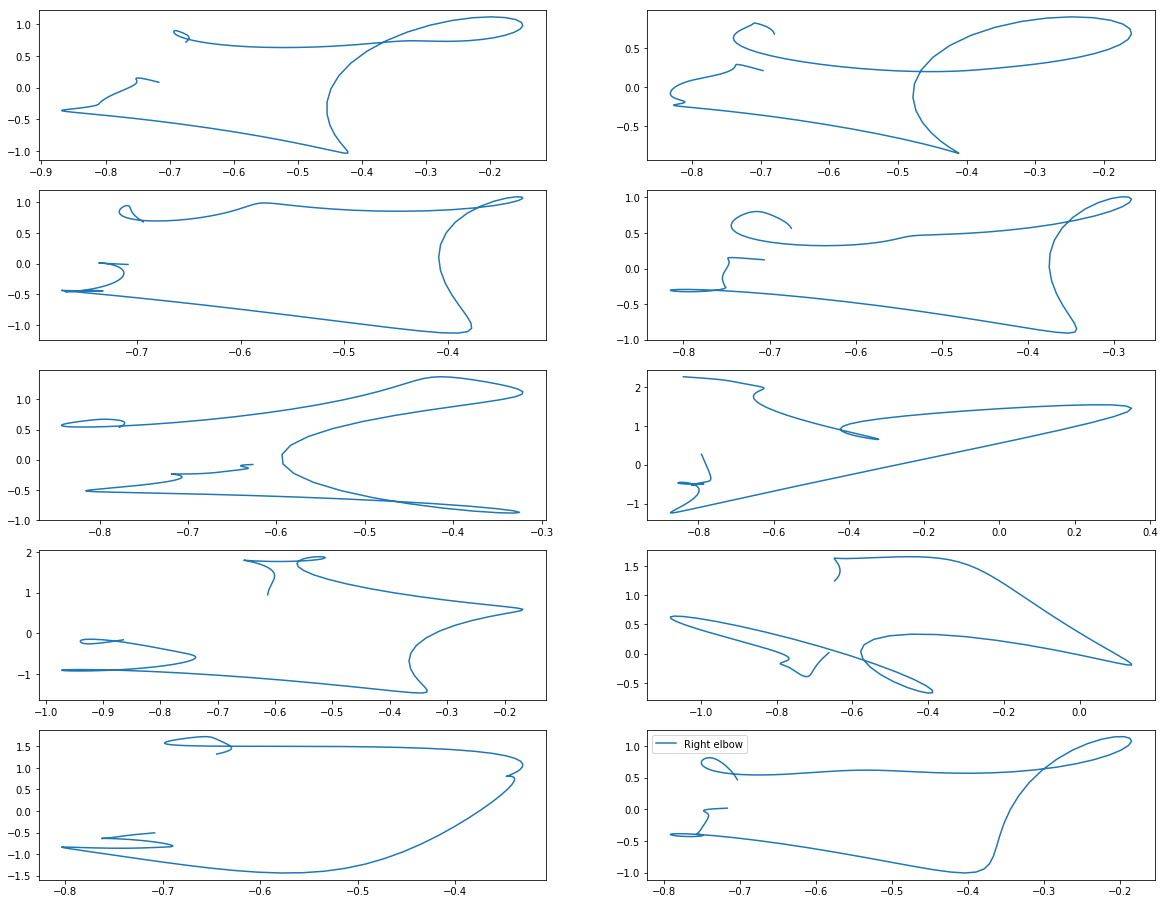

-----------------------------------------------------------------------------
JOINT:  Right wrist


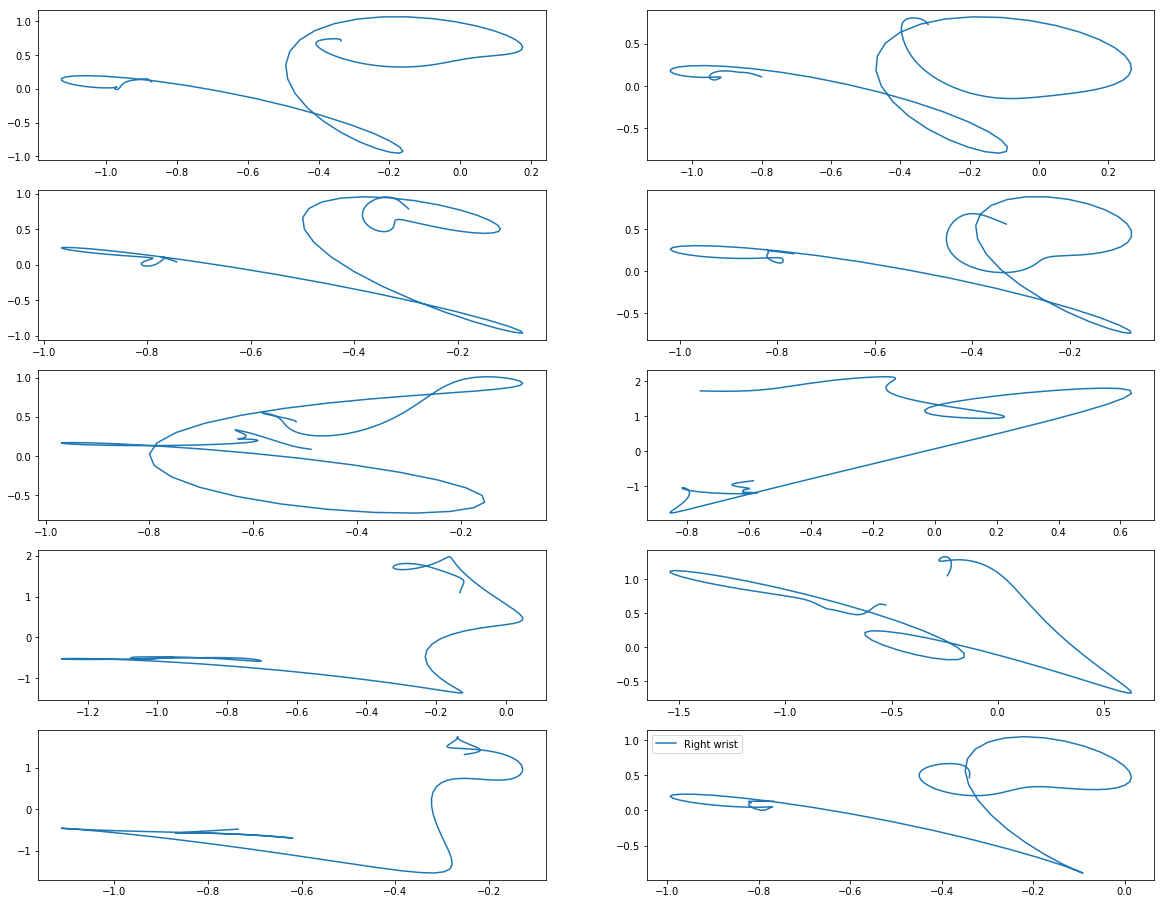

-----------------------------------------------------------------------------
JOINT:  Left shoulder


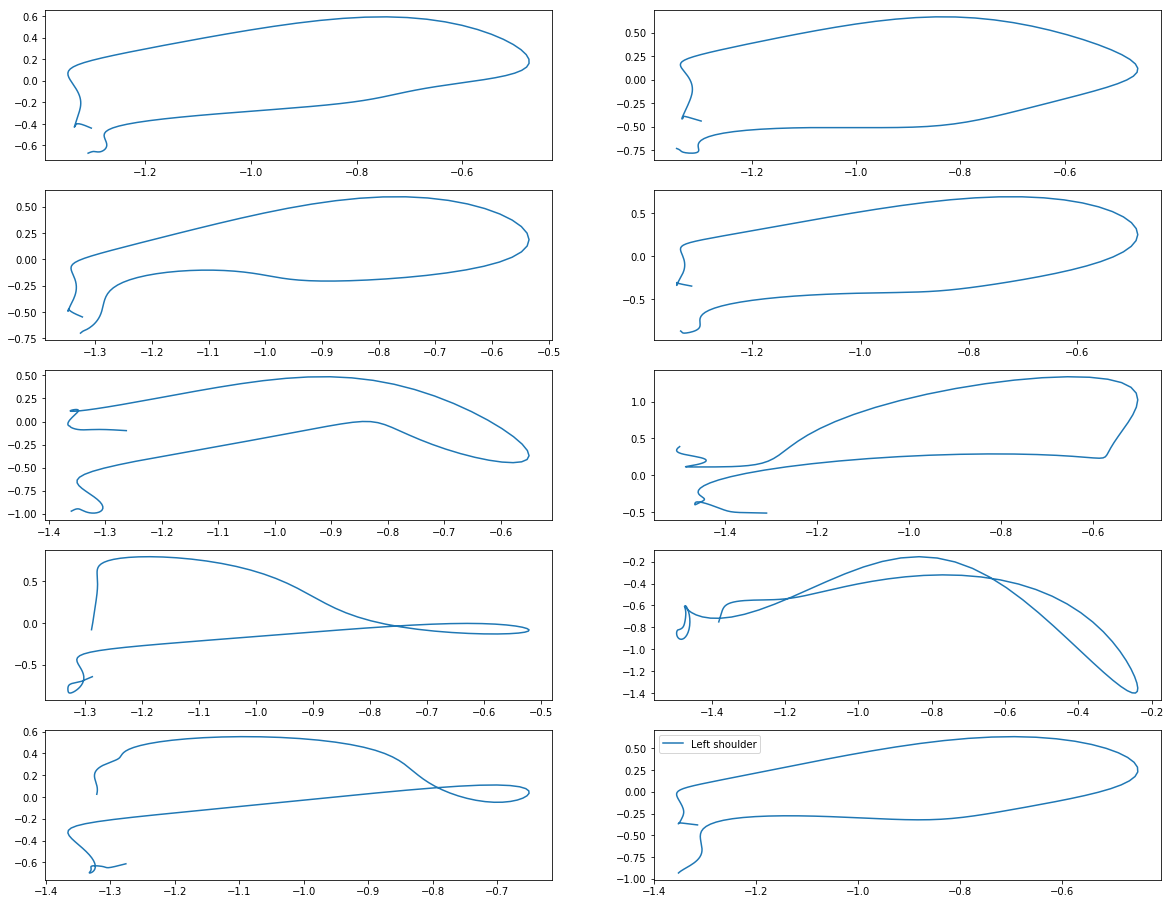

-----------------------------------------------------------------------------
JOINT:  Left elbow


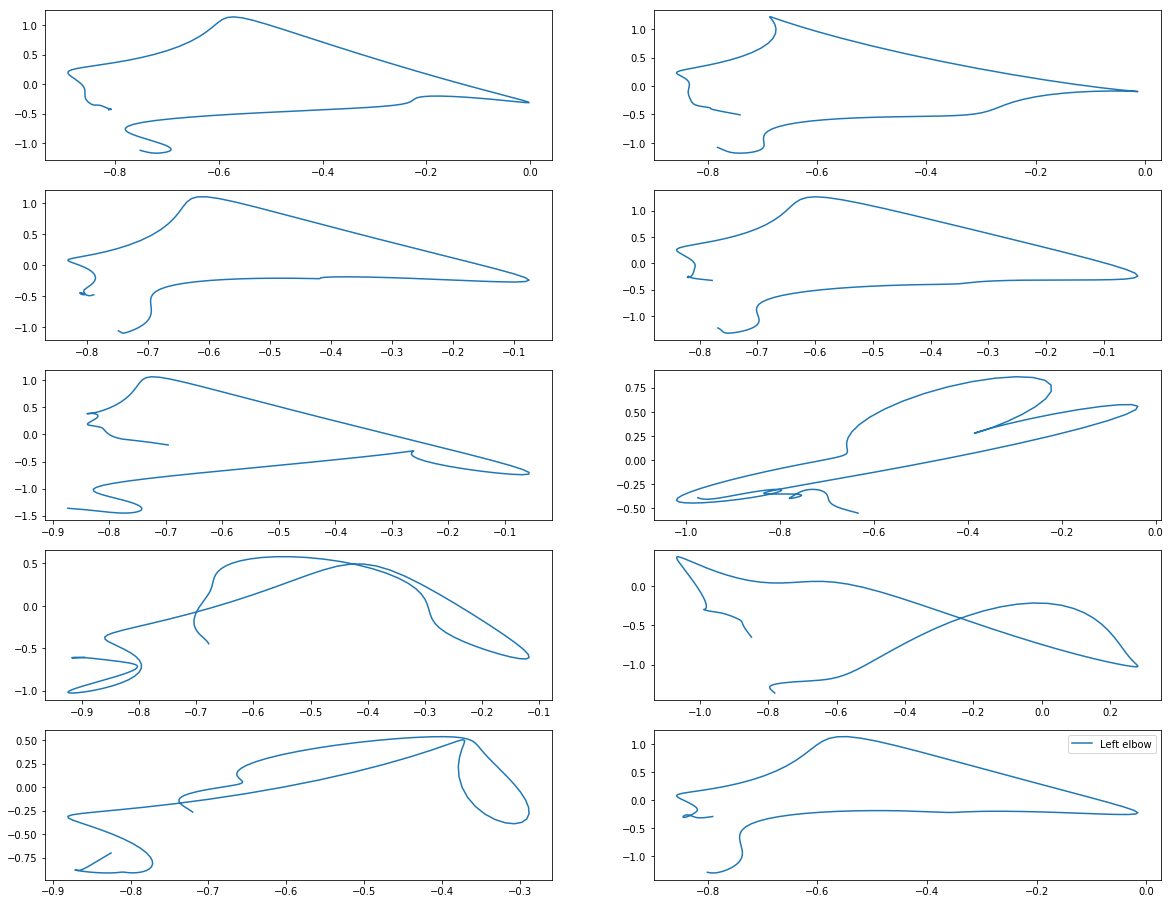

-----------------------------------------------------------------------------
JOINT:  Left wrist


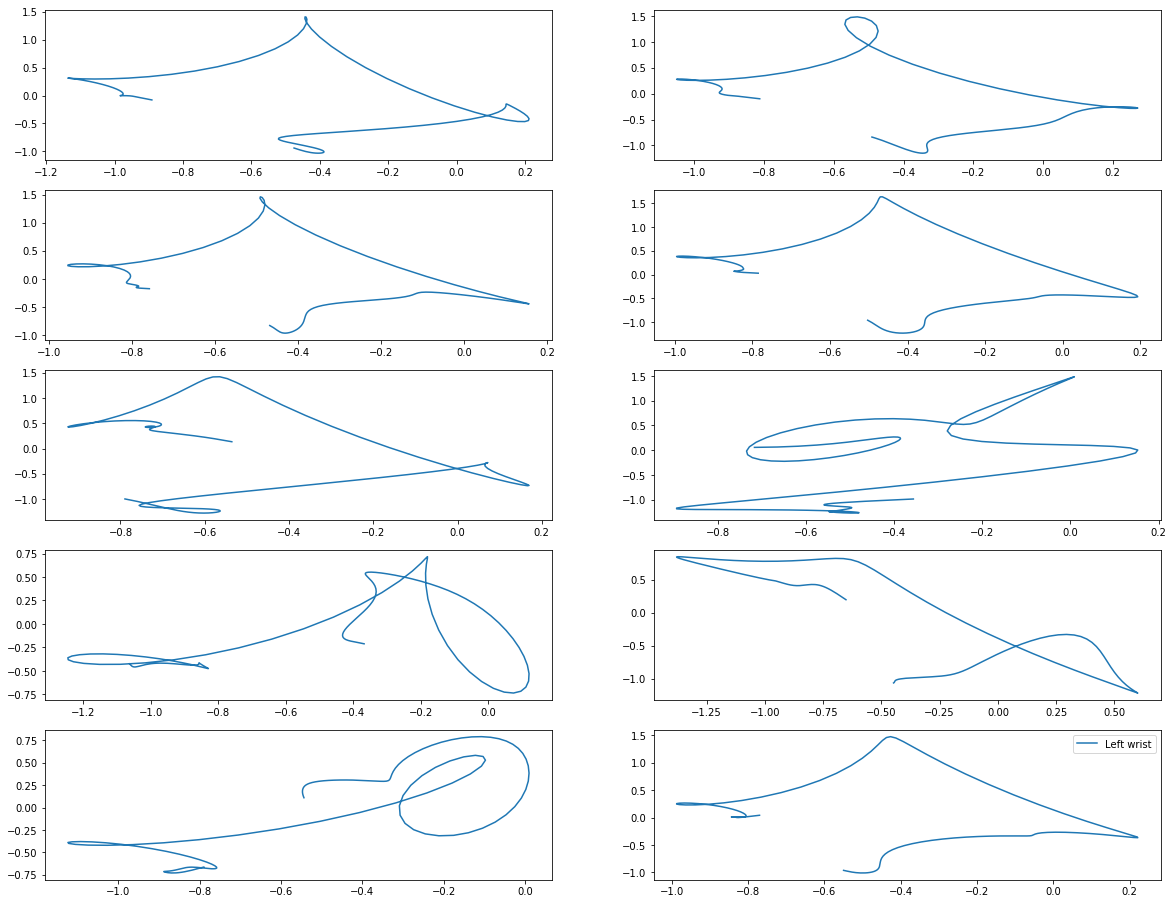

-----------------------------------------------------------------------------
JOINT:  Right hip


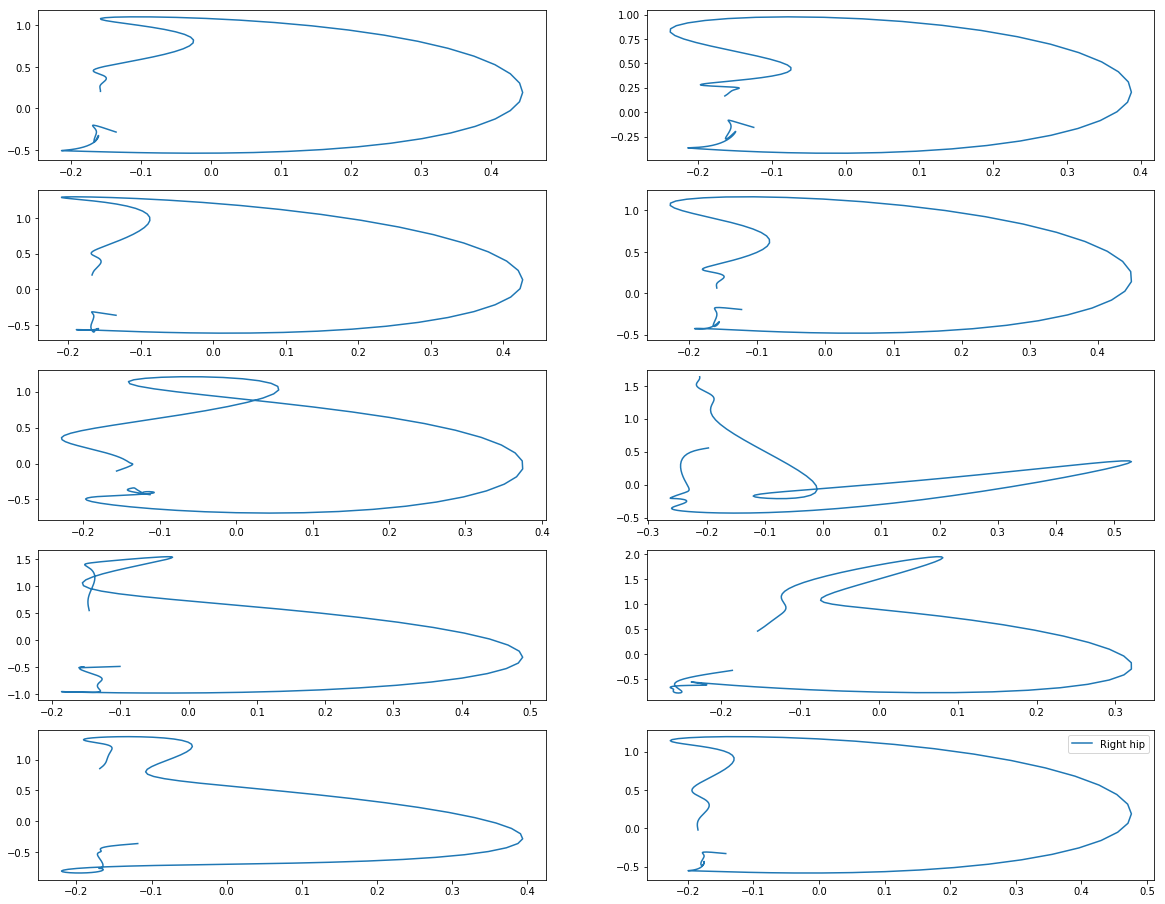

-----------------------------------------------------------------------------
JOINT:  Right knee


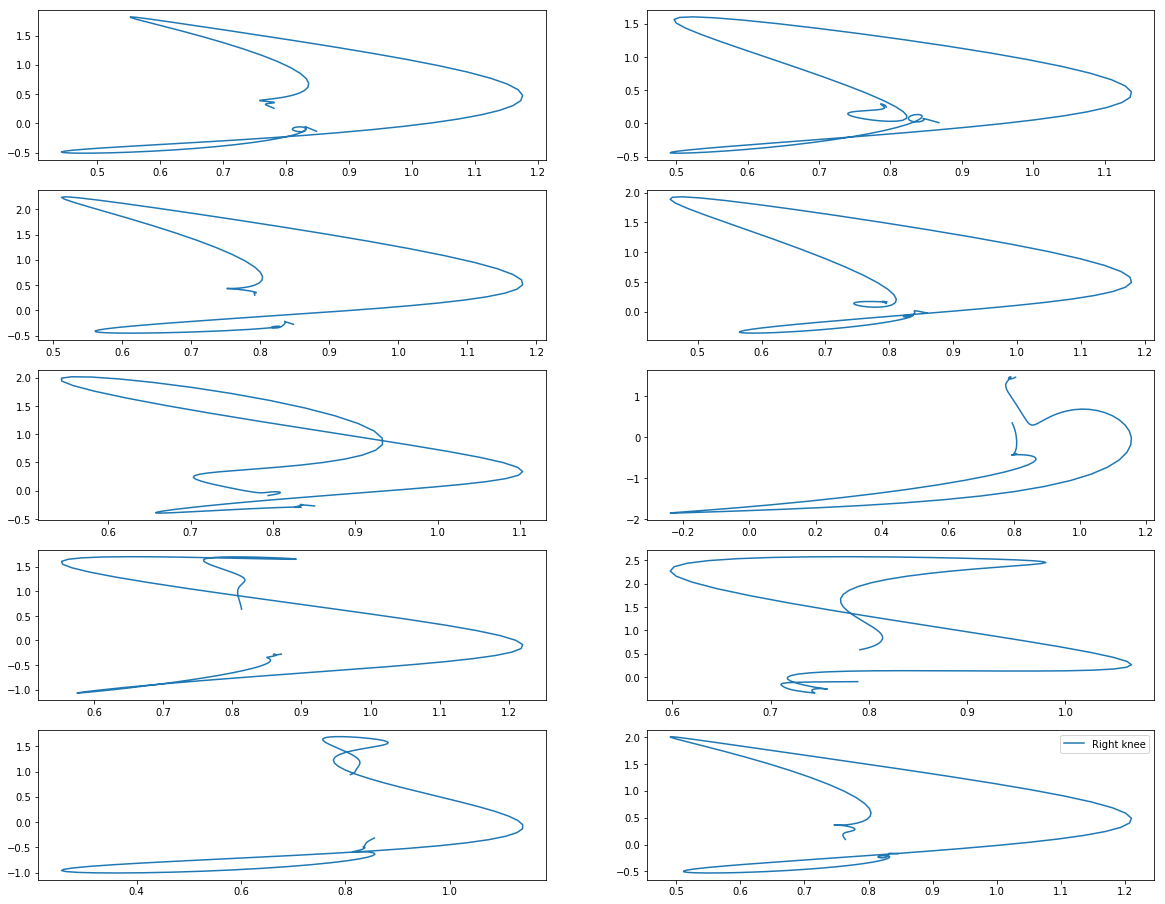

-----------------------------------------------------------------------------
JOINT:  Right ankle


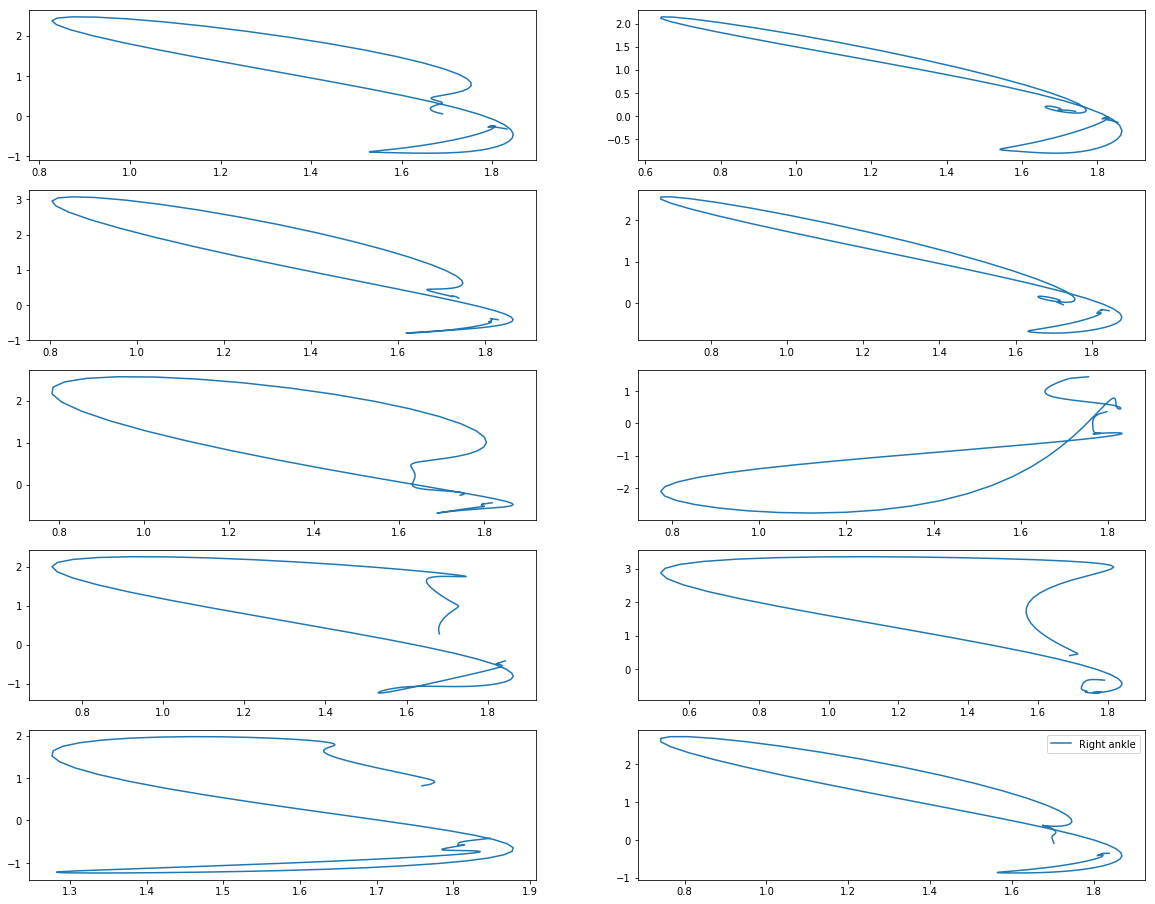

-----------------------------------------------------------------------------
JOINT:  Left hip


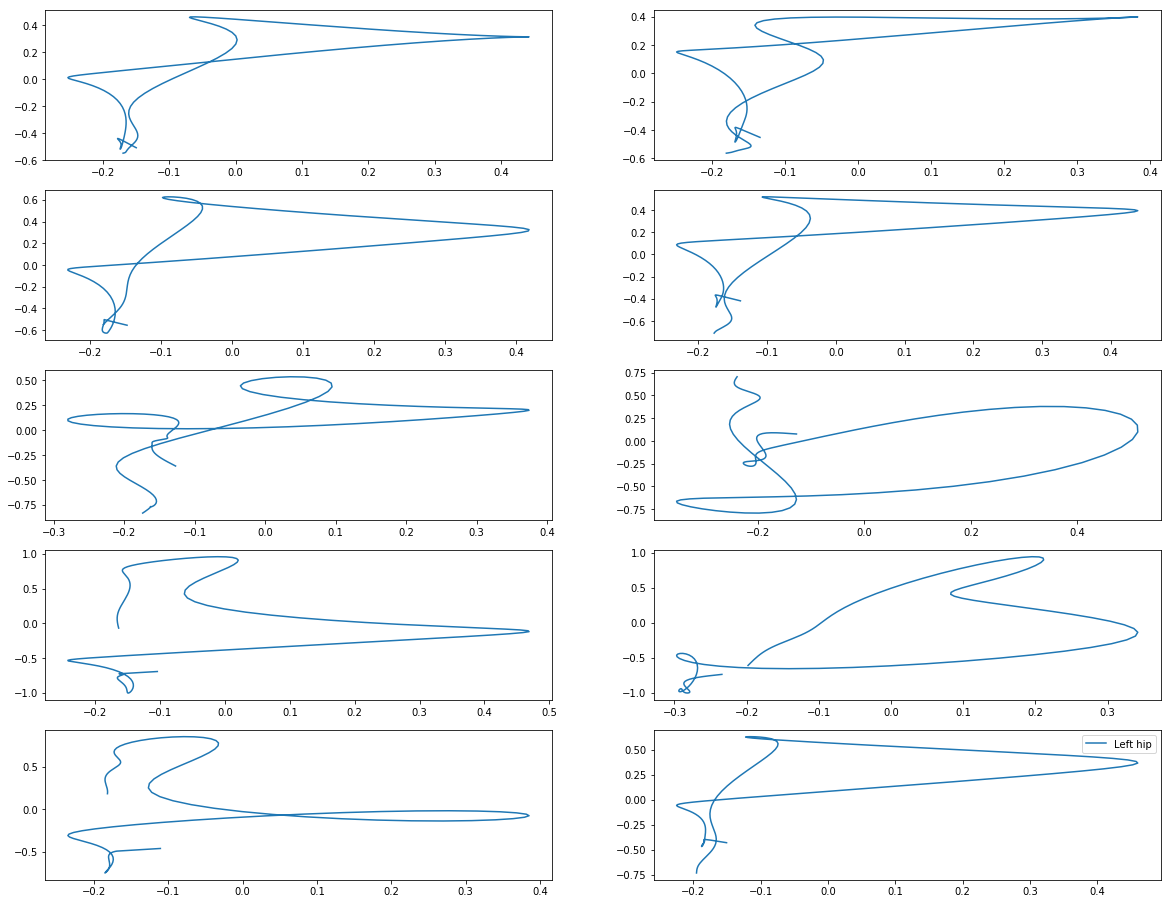

-----------------------------------------------------------------------------
JOINT:  Left knee


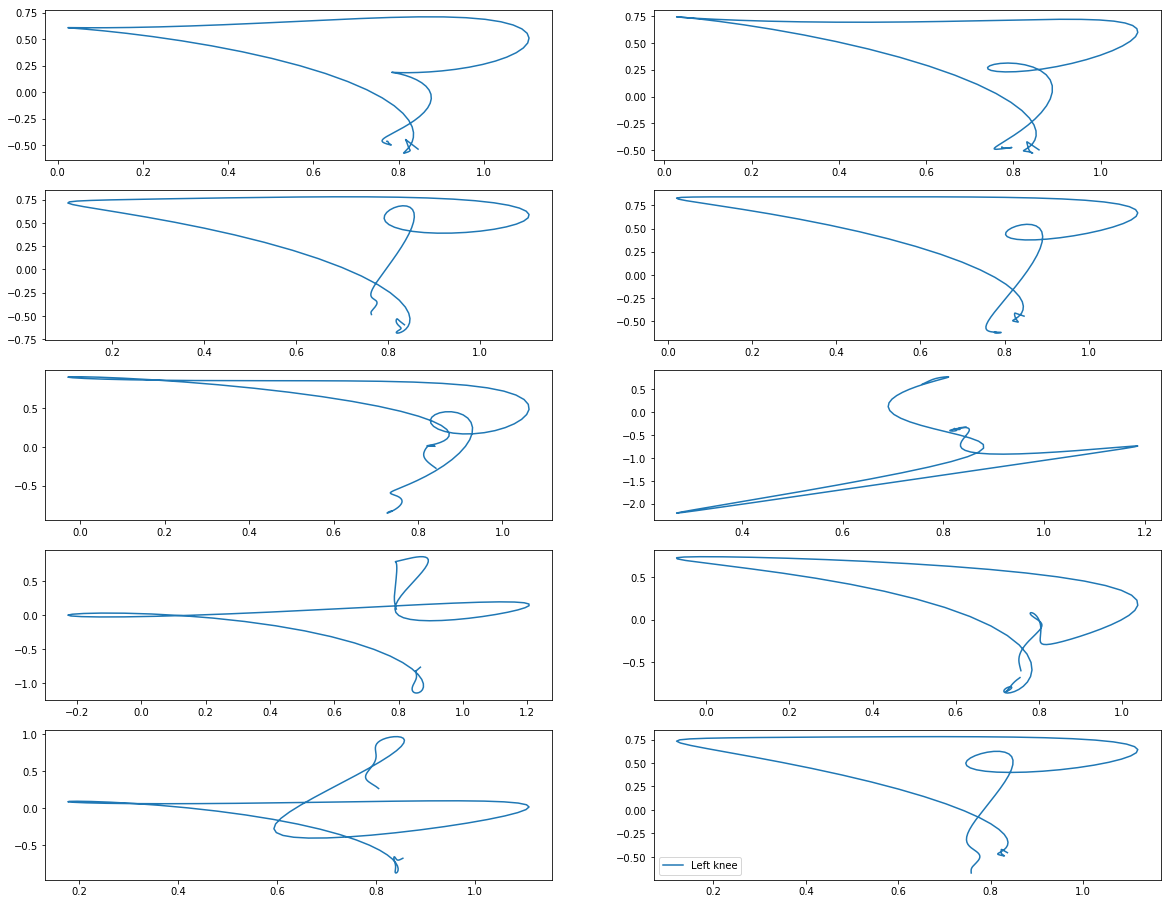

-----------------------------------------------------------------------------
JOINT:  Left ankle


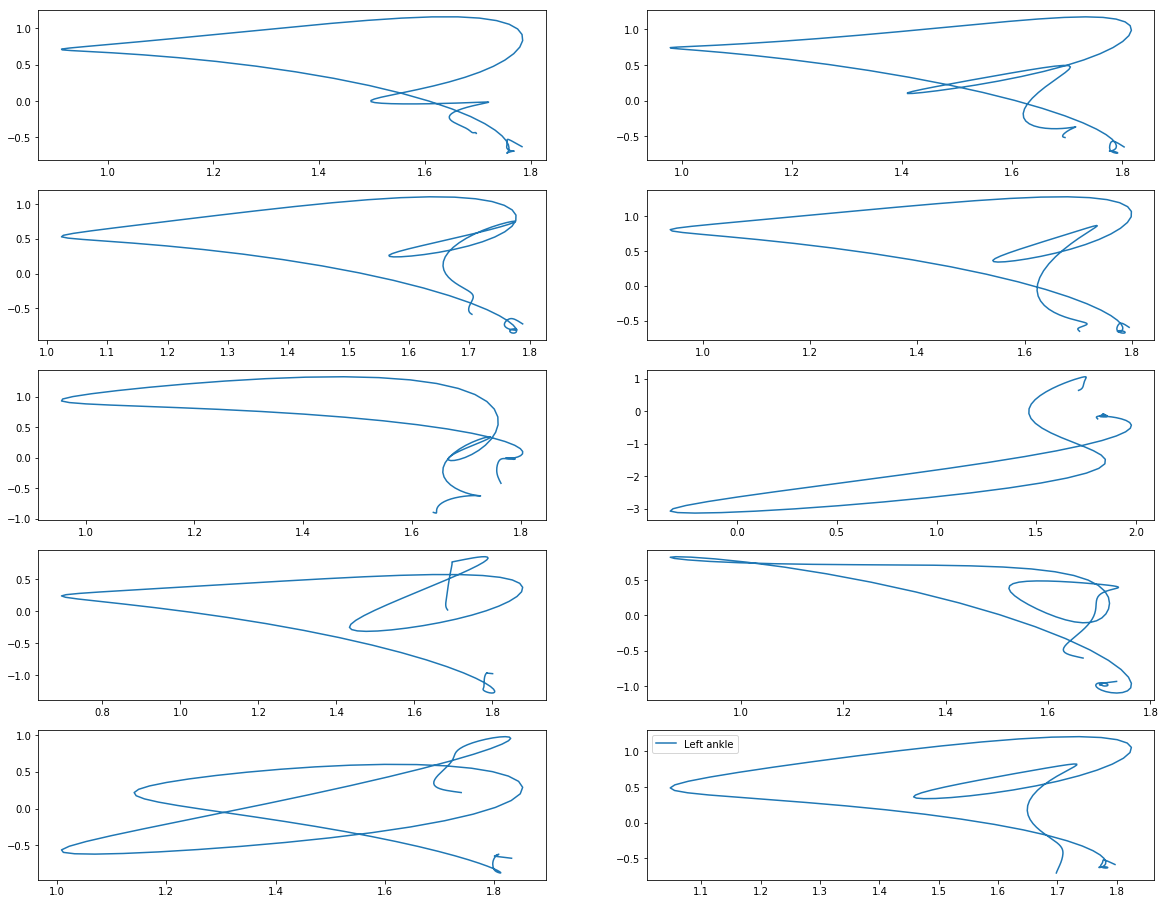

In [35]:
def normalize(data):
    """
    normalizes across frames - axix to zero mean and standard deviation
    """
    M,N, nr_joints,_ = data.shape
    means = np.mean(data, axis = (1,2))
    std = np.std(data, axis = (1,2))
    print(std.shape)
    res = np.asarray([[(data[:,i,j,:]-means)/(std+0.000001) for i in range(len(data[0]))] for j in range(12)])
    print(res.shape)
    data_new = np.swapaxes(res, 0,2)
    #data_new = np.swapaxes(data_new, 2,1)
    #data_new = np.swapaxes(data_new, 2,3)
    print(data_new.shape)
    return data_new

import matplotlib.pylab as plt
joints=["Right shoulder",  "Right elbow", "Right wrist","Left shoulder","Left elbow", "Left wrist",
        "Right hip", "Right knee", "Right ankle", "Left hip", "Left knee", "Left ankle", "Neck ", 
        "Right eye", "Right ear","Left eye", "Left ear"]
#from tools import Tools
#aligned = Tools.align_frames(data, pre.get_release_frame(60, 120), 60, 40)
#aligned = Tools.normalize(aligned)
aligned = normalize(data)
ALIGNING = True
ERRORBAR = False
START_JOINT = 0
NR_JOINTS = 12
nr_examples = len(data) # 100
cutoff_example_nr = 10

meansX = np.zeros((len(index_liste), NR_JOINTS))
meansY = np.zeros((len(index_liste), NR_JOINTS))
errorX = np.zeros((len(index_liste), NR_JOINTS))
errorY = np.zeros((len(index_liste), NR_JOINTS))

for i in range(NR_JOINTS):
    
    print("-----------------------------------------------------------------------------")
    print("JOINT: ", joints[i])
    #print(unique[j],"std_sum: ", stds, "anzahl: ", len(frame))
    #print(unique[0], len(frame))
    #print(len(np.mean(frame[:, :, 6+i,1], axis = 0)))
    fig = plt.figure(figsize=(20,16)) # plt.subplots(5,2)
    for j in range(len(index_liste)):
        stds = 0
        nr_examples = len(index_liste[j][0])    #100
        index = index_liste[j][0][:nr_examples]
        #print(indizes)
        #print(len(frame))
        if ALIGNING:
            frame = aligned[index]
        else:
            frame = data[index]
        #print(unique[j])
        fig.add_subplot(5,2,j+1)
        x = frame[:, :, START_JOINT+i,1]
        y = frame[:, :, START_JOINT+i,0]
        #print("shape", x.shape)
        meX = np.mean(x, axis = 0)
        meY = np.mean(y, axis = 0)
        error = []
        for k, exa in enumerate(x):
            error.append(sum(abs(exa-meX)))
        nr = 0
        for k, exa in enumerate(x):
            if nr<cutoff_example_nr: # sum(abs(exa-meX))< np.median(error) and 
                #plt.plot(exa, y[k])
                nr+=1
        #print(error)
        stdX = np.std(x, axis = 0)
        stdY = np.std(y, axis = 0)
        stds+= np.mean(stdX)+np.mean(stdY)
        plt.plot(meX, meY, label= unique[j]) #joints[START_JOINT+i])
        if ERRORBAR:
            plt.errorbar(meX, meY, yerr = stdY, xerr = stdX, label=joints[START_JOINT+i])
        #plt.ylim(-3, 3)
        #plt.xlim(-3, 3)
    plt.legend()
    plt.show()

## Results
STD is a bit smaller if videos are aligned

## Test deep learning coordinate prediction

[-1.95698294 -1.3046553  -1.3046553  -1.3046553  -1.3046553  -0.97849147
 -0.65232765  0.          0.          0.          0.65232765  0.65232765
  0.65232765  0.97849147  0.97849147  0.97849147  0.97849147  0.97849147
  0.97849147] 0.649953 0.978491471283


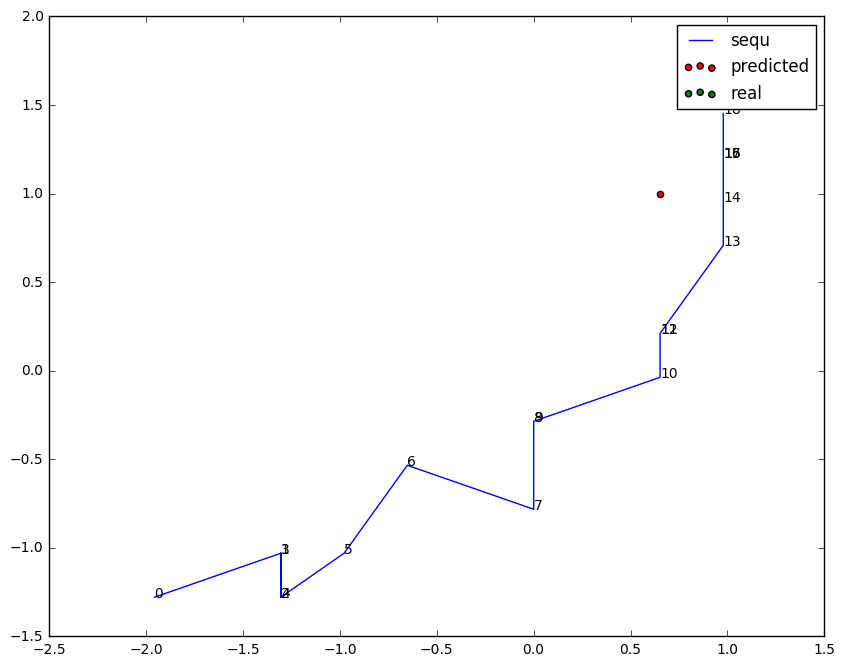

[-1.92624468 -1.51199851 -1.51199851 -1.51199851 -1.09775234 -0.68350618
 -0.68350618  0.14498616  0.14498616  0.55923233  0.97347849  0.97347849
  0.97347849  0.97347849  0.97347849  0.97347849  0.55923233  0.55923233
  0.55923233] 0.458693 0.559232326081


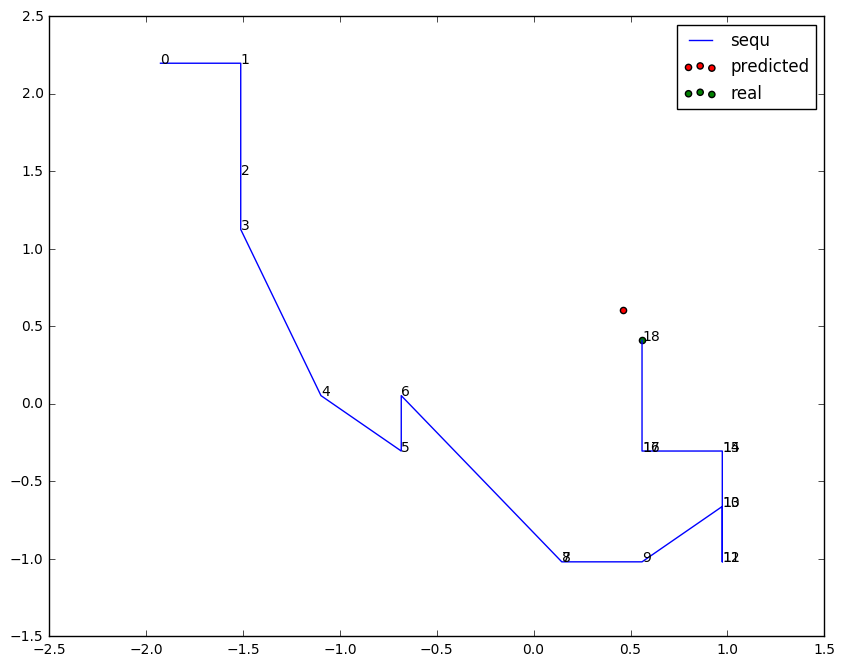

[-1.37500273 -1.15846687 -1.15846687 -1.15846687 -1.15846687 -0.94193101
 -0.72539514 -0.29232342 -0.50885928 -0.29232342  0.14074831  0.14074831
  0.35728418  0.35728418  0.7903559   1.00689177  1.43996349  1.43996349
  1.65649936] 0.991018 1.43996349374


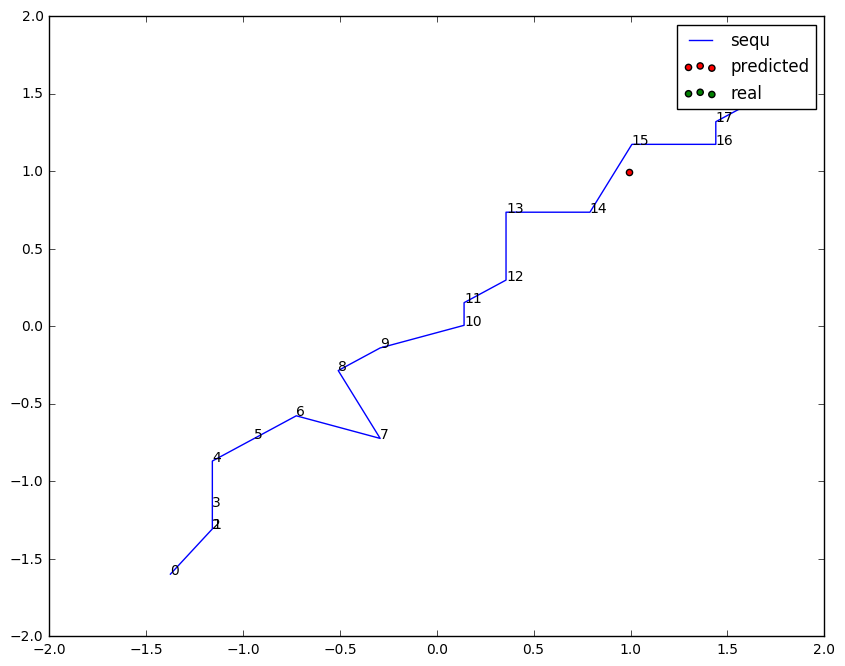

[-0.68955424 -0.8518023  -1.17629841 -0.8518023  -0.8518023  -0.8518023
 -0.8518023  -0.8518023  -0.8518023  -0.20281007 -0.04056201 -0.04056201
  0.12168604 -0.04056201  0.2839341   0.77067827  1.58191855  1.58191855
  2.06866272] 0.999412 1.74416660438


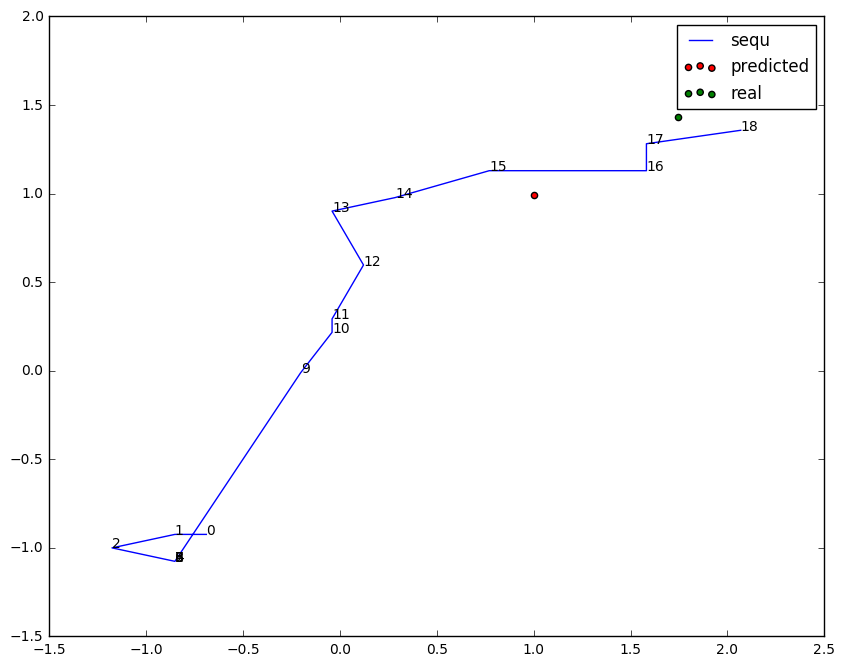

[-1.92842398 -1.43395629 -1.43395629 -1.43395629 -0.44502092  0.04944677
  0.04944677  0.54391446  0.54391446  1.53284983  0.54391446  1.03838214
  2.02731752  0.54391446  0.54391446  0.54391446  0.04944677 -0.44502092
 -0.44502092] -0.507884 -0.445020918693


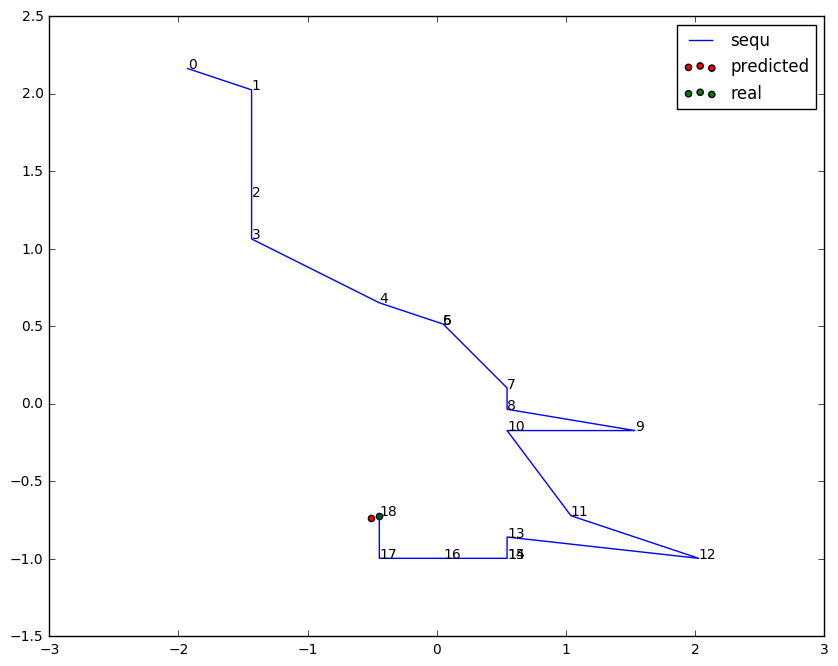

[-1.43663543 -0.89450885 -0.62344556 -0.62344556 -0.08131899  1.27399745
  1.00293417  1.27399745  1.81612403  1.81612403 -0.62344556  0.1897443
  1.27399745 -0.35238227 -0.35238227 -0.35238227 -0.35238227 -0.89450885
 -0.89450885] -0.948304 -1.16557213823


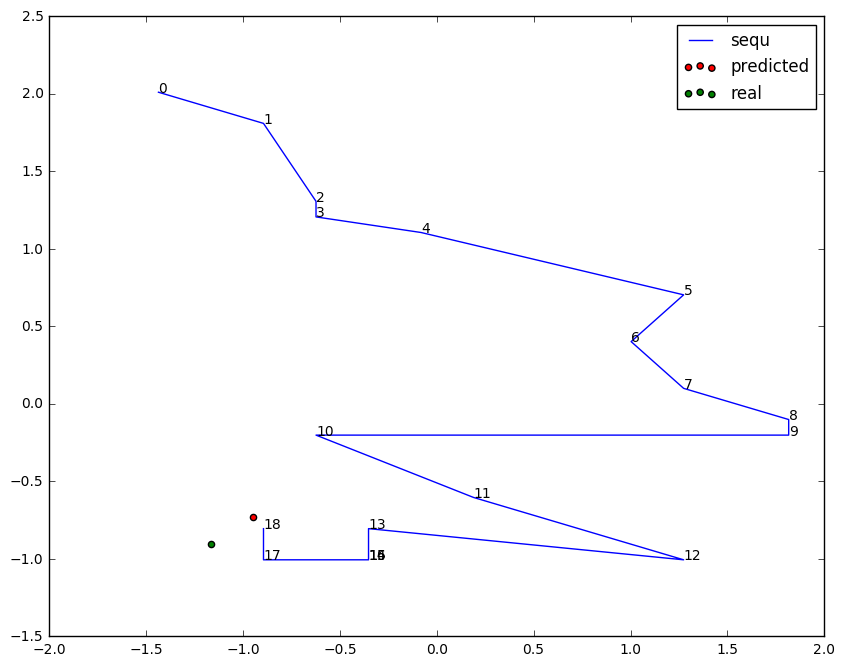

In [30]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
bsp = 18
s1 = np.load("sequ/seque_coord.npy")[bsp]
p1 = np.load("sequ/out_coord.npy")[bsp]
r1 = np.load("sequ/real_coord.npy")[bsp]
"""s1 = sequ[0]
s2 = sequ[1]
p1 = predicted[0]
p2 = predicted[1]"""
#print(s1, p1)
#fig = plt.figure(figsize=(20,10))
#print(s1.shape, p1.shape)
for i in range(6):
    print(s1[:, 2*i], p1[2*i], r1[2*i])
    ax = plt.subplot(111)
    ax.plot(s1[:, 2*i], s1[:, 2*i+1], label = "sequ")
    for k in range(len(s1)):
        ax.annotate(str(k), (s1[k, 2*i], s1[k, 2*i+1]))
    ax.scatter(p1[2*i], p1[2*i+1], c="red", label = "predicted")
    ax.scatter(r1[2*i], r1[2*i+1], c="green", label = "real")
    ax.legend()
    plt.show()

# Timing tests

In [ ]:
"""
Problems: pytorch and tensorflow are somehow incompatible - once a pytorch model is started, 
creating a tensorflow session leads to a coredump because of an internal python memory error 
"""
('shape', (1, 167, 18, 2))
('Time to read in video and handle one:', 57.31005096435547)
('nach handle one shape --> all detected people in the frame', (167, 12, 18, 2))
('time for df_coordinates (selecting right player, fill in missing values...)', 27.217700958251953)
('shape input for ANN', (1, 167, 18, 2))
('Time for whole video to array step: ', 84.64371180534363)
('Time for array load and runner', 1.3805208206176758)
('predicted', ['Fastball (2-seam)'], 'truth', array(['Fastball (2-seam)'],dtype='|S17'), 'accuracy', 1.0
 
 OR:
 
 ('Time to read in video and handle one:', 61.53413200378418)
('time for df_coordinates', 31.455853939056396)
('shape', (1, 167, 18, 2))
('Time for array load and runner', 1.4578359127044678)
('vorhergesagt', ['Sinker'], 'truth', array(['Sinker'], dtype='|S6'), 'accuracy', 1.0
 
 Specific times:
 ('handle one1', 5.793571472167969e-05)
('handle one 2', 0.1919260025024414)
('handle one 3', 0.4836001396179199)
('handle one 4', 0.0747530460357666)
('handle one 5', 0.017817020416259766)
('handle one 6', 0.00047397613525390625)
 ('handle one1', 2.002716064453125e-05)
('handle one 2', 0.002607107162475586)
('handle one 3', 0.10315203666687012)
('handle one 4', 0.0741269588470459)
('handle one 5', 0.018039941787719727)
('handle one 6', 0.0005102157592773438)
 ('Time to read in video and handle one:', 61.37848711013794)
('Time for player_localization: ', 0.08333992958068848)
('Time for player_localization: ', 0.05714106559753418)
('Time for player_localization: ', 0.050184011459350586)
 ('Time for mix right left', 0.025226116180419922)
('Time for mix right left', 0.0242462158203125)
('Time for mix right left', 0.02407217025756836)
('Time for mix right left', 0.02440786361694336)
 ('Time for continuity ', 8.715142965316772)
('Time for continuity ', 8.832612991333008)
('time for df_coordinates', 35.55333495140076)
('Time for whole video to array: ', 97.31024312973022)
('Time for array load and runner', 1.3065440654754639)
('vorhergesagt', ['Sinker'], 'truth', array(['Sinker'], dtype='|S6'), 'accuracy', 1.0)
 --> Continuity is slow and does not work well